In [4]:
import sys
import os
import numpy as np
from scipy.optimize import curve_fit
import random
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import datetime
import pdb #python debugger
from timeit import default_timer as timer #timer
from collections import OrderedDict
import importlib
sys.path.insert(1,'/home/ryanlopez/ABPTutorial/c++') #Connects to ABP Folder github.com/ryanlopezzzz/ABPTutorial
from cppmd.builder import *
import cppmd as md
import read_data as rd #reads snapshot text data
import directories #used to create directories for saving data
from Analysis_Calculations import (flocking_factors, dir_cross_vel, dir_dot_vel, msd, speed_dist)

In [5]:
save_dir = "/home/ryanlopez/Polar_Align_Saved_Data"
exp_name = "phi=0.6000_and_v0=0.0100_high_resolution"
run_name = "J=0.2400_and_Dr=0.0280"

run_path = os.path.join(save_dir, exp_name, run_name)

run_desc_file = open(os.path.join(run_path, 'run_desc.json'))
run_desc = json.loads(run_desc_file.read())
run_desc_file.close()

single_stats_file = open(os.path.join(run_path, 'single_stats.json'))
single_stats = json.loads(single_stats_file.read())
single_stats_file.close()


vicsek_val = single_stats['vicsek_param']
dir_dot_vel_val = single_stats['dir_dot_vel']
dir_dot_vel_norm_val = single_stats['dir_dot_vel_norm']
dir_cross_vel_val = single_stats['dir_cross_vel']
dir_cross_vel_norm_val = single_stats['dir_cross_vel_norm']

vicsek_dev = single_stats['vicsek_param_std_dev']
dir_dot_vel_dev = single_stats['dir_dot_vel_std_dev']
dir_dot_vel_norm_dev = single_stats['dir_dot_vel_norm_std_dev']
dir_cross_vel_dev = single_stats['dir_cross_vel_std_dev']
dir_cross_vel_norm_dev = single_stats['dir_cross_vel_norm_std_dev']

#msd = np.load(os.path.join(run_path, 'msd.npy'))
#msd_minus_flock = np.load(os.path.join(run_path, 'msd_minus_flock.npy'))
#msd_parallel = np.load(os.path.join(run_path, 'msd_parallel.npy'))
#msd_perp = np.load(os.path.join(run_path, 'msd_perp.npy'))

In [7]:
snapshot_dir = os.path.join(run_path, "snapshot_data/")
exp_data = rd.get_exp_data(snapshot_dir)

In [6]:
tf = 5e5
num_snapshots = 5000
times = np.linspace(0, tf, num=num_snapshots)

warm_up_time = 0
sim_time = 5e5

# Director Cross Velocity

In [8]:
dir_cross_vel_time = dir_cross_vel.get_dir_cross_vel(exp_data)
dir_cross_vel_norm_time = dir_cross_vel.get_dir_cross_vel_norm(exp_data)

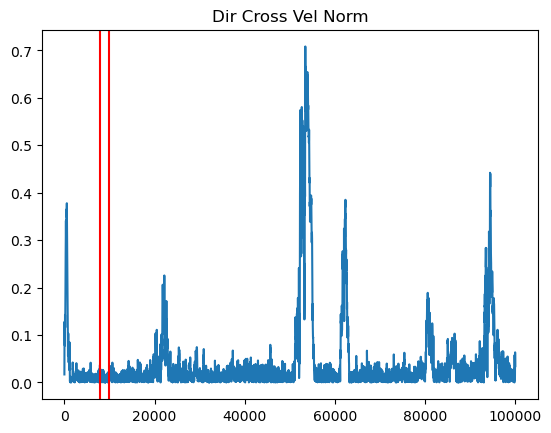

In [58]:
plt.plot(times, np.absolute(dir_cross_vel_norm_time))
plt.title('Dir Cross Vel Norm')
#plt.axvline(x=warm_up_time, color='red')
#plt.axvline(x=sim_time, color = 'red')
plt.show()

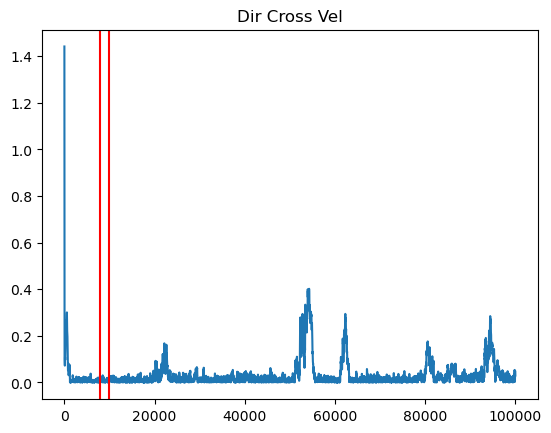

In [59]:
plt.plot(times, np.absolute(dir_cross_vel)/0.03)
plt.title('Dir Cross Vel')
plt.axvline(x=warm_up_time, color='red')
plt.axvline(x=sim_time, color = 'red')
plt.show()

# MSD

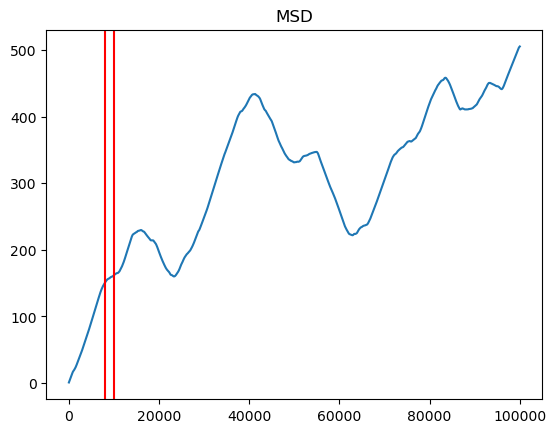

In [60]:
plt.plot(times[1:], np.sqrt(msd))
plt.title('MSD')
plt.axvline(x=warm_up_time, color='red')
plt.axvline(x=sim_time, color = 'red')
plt.show()

# Vicsek Parameter

In [42]:
vicsek_param, vel_param = flocking_factors.get_flocking_factors(exp_data, run_desc['v0'])

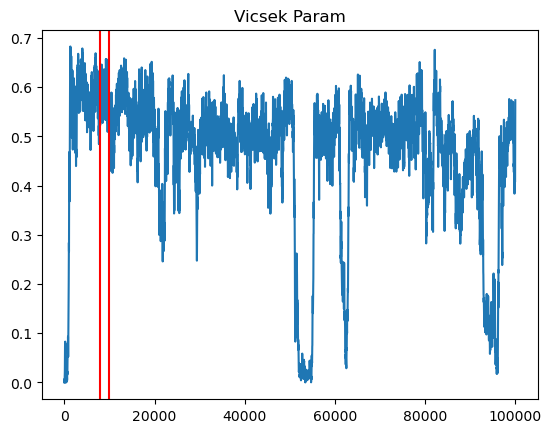

In [61]:
plt.plot(times, vicsek_param)
plt.title('Vicsek Param')
plt.axvline(x=warm_up_time, color='red')
plt.axvline(x=sim_time, color = 'red')
plt.show()

# Dir dot Vel

In [47]:
dir_dot_vel, dir_dot_vel_norm = various.get_dir_dot_vel(exp_data)

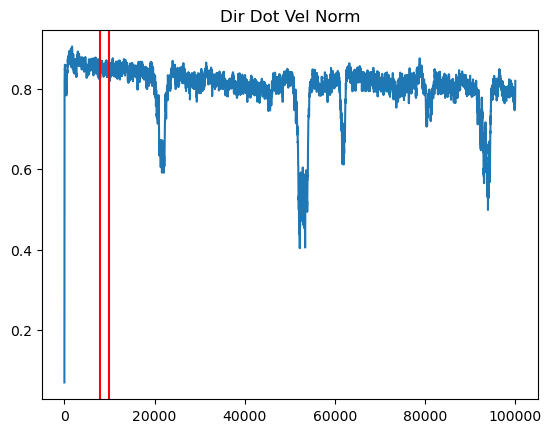

In [62]:
plt.plot(times, dir_dot_vel_norm)
plt.title('Dir Dot Vel Norm')
plt.axvline(x=warm_up_time, color='red')
plt.axvline(x=sim_time, color = 'red')
plt.show()